                                               Case study on Pre-processing

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


1)-Load the dataset into python environment

In [52]:
data = pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2)-Make ‘PassengerId’ as the index column

In [53]:
data1 = data.set_index("PassengerId")
data1.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3)-Check the basic details of the dataset

In [54]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [55]:
data1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
data1.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [57]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


4)-Fill in all the missing values present in all the columns in the dataset

In [75]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [76]:
print('Number of rows containing NAN = ', data1.isna().any(axis = 1).sum())

Number of rows containing NAN =  708


In [77]:
data1['Age'].fillna(round(data1['Age'].mean(), 0), inplace = True)

In [78]:
data1['Cabin'].fillna(data1['Cabin'].mode().loc[0], inplace = True)

In [79]:
data1['Embarked'].fillna(data1['Embarked'].mode().loc[0], inplace = True)

In [80]:
data1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

In [81]:
def find_outliers(series):
    Q1 = np.percentile(series, 25, interpolation = 'midpoint')
    Q2 = np.percentile(series, 50, interpolation = 'midpoint')
    Q3 = np.percentile(series, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5*IQR
    up_lim = Q3 + 1.5*IQR
    print(f'Q1 = {Q1}, Q2 = {Q2} and Q3 = {Q3}')
    print(f'IQR = {IQR}, Upper limit = {up_lim} and Lower limit = {low_lim}')
    outlier_list = []
    for x in series:
        if((x>up_lim) or (x<low_lim)):
            outlier_list.append(x)
    print(f'There are {len(outlier_list)} Outliers for {series.name}, they are {outlier_list}')
    return outlier_list

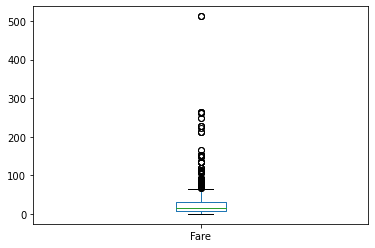

In [82]:
data1['Fare'].plot.box()
plt.show()

In [83]:
age_outliers = find_outliers(data1['Age'])
age_index = data1[data1['Age'].isin(age_outliers)].index
age_index

Q1 = 22.0, Q2 = 30.0 and Q3 = 35.0
IQR = 13.0, Upper limit = 54.5 and Lower limit = 2.5
There are 66 Outliers for Age, they are [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [85]:
data1.drop(age_index, inplace = True)                           

In [86]:
data1.shape

(825, 11)

In [87]:
fare_outliers = find_outliers(data1['Fare'])
fare_index = data1[data1['Fare'].isin(fare_outliers)].index
fare_index

Q1 = 7.8958, Q2 = 13.4167 and Q3 = 30.0708
IQR = 22.174999999999997, Upper limit = 63.333299999999994 and Lower limit = -25.366699999999994
There are 107 Outliers for Fare, they are [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [88]:
data1.drop(fare_index, inplace = True)
data1.shape

(718, 11)

In [90]:
sib_outliers = find_outliers(data1['SibSp'])
sib_index = data1[data1['SibSp'].isin(sib_outliers)].index
sib_index

Q1 = 0.0, Q2 = 0.0 and Q3 = 1.0
IQR = 1.0, Upper limit = 2.5 and Lower limit = -1.5
There are 29 Outliers for SibSp, they are [3, 4, 5, 3, 4, 5, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 4, 3, 4]


Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [91]:
data1.drop(sib_index, inplace = True)
data1.shape

(689, 11)

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [92]:
X = data1[['Pclass', 'Age', 'SibSp','Parch','Fare']]

In [93]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.493469,29.169811,0.272859,0.269956,16.631246
std,0.723586,9.548083,0.501020,0.754625,13.092563
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,30.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.450000
max,3.000000,54.000000,2.000000,6.000000,61.379200


In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
scaler = MinMaxScaler(feature_range =(0,1))
X = scaler.fit_transform(X)
X= pd.DataFrame(X)
X.describe()

,0,1,2,3,4
count,689.000000,689.000000,689.00000,689.000000,689.000000
mean,0.746734,0.513134,0.13643,0.044993,0.270959
std,0.361793,0.187217,0.25051,0.125771,0.213306
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.500000,0.392157,0.00000,0.000000,0.127962
50%,1.000000,0.529412,0.00000,0.000000,0.171068
75%,1.000000,0.588235,0.00000,0.000000,0.382051
max,1.000000,1.000000,1.00000,1.000000,1.000000
